<center>
# ПРИЛОЖЕНИЕ 5
<center>
# РЕШЕНИЕ ДОМАШНЕГО ЗАДАНИЯ 3

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

In [2]:
# записываем Excel-файл в объект DataFrame
data = pd.read_excel('Data/renewed_data.xlsx', 
                     sheet_name='data')

In [3]:
# выводим первые 5 наблюдений датафрейма
data.head()

ID        Make    Model  Power      Price  Is_credit  Begin_month  \
0  1000000301         Kia     Ceed  129.0   614500.0          1            2   
1  1000034155        Ford    Focus  125.0   708000.0          1            4   
2  1000036840  Mitsubishi   Pajero  178.0   900000.0          0           10   
3  1000055374      Subaru  Outback  167.0  1500000.0          0            1   
4  1000070327        Ford   Mondeo  199.0   814302.0          1            6   

   End_month  Is_renewed  Years_renewed  Price_change  Sales_channel  \
0          2           0              1          0.04             52   
1          4           1              0         -0.28             52   
2         10           1              0         -0.01             50   
3          1           1              0         -0.10             50   
4          6           0              3         -0.21             52   

           Fillial   Agent  Min_age  Min_exp M_F           Region  OSAGO  \
0  Санкт-Петербург   245.0       58        4   F  Санкт-Петербург      1   
1  Санкт-Петербург   493.0       52       18   F       Мурманская      0   
2           Москва     NaN       41       17   M           Москва      0   
3           Москва     NaN       34       15   M           Москва      0   
4  Санкт-Петербург  1096.0       43       17   M  Санкт-Петербург      0   

   Deductible  
0         0.0  
1     15000.0  
2     20000.0  
3     10000.0  
4     20000.0

In [4]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54481 entries, 0 to 54480
Data columns (total 20 columns):
ID               54481 non-null int64
Make             54481 non-null object
Model            54481 non-null object
Power            54481 non-null float64
Price            54481 non-null float64
Is_credit        54481 non-null int64
Begin_month      54481 non-null int64
End_month        54481 non-null int64
Is_renewed       54481 non-null int64
Years_renewed    54481 non-null int64
Price_change     54481 non-null float64
Sales_channel    54481 non-null int64
Fillial          54481 non-null object
Agent            41782 non-null float64
Min_age          54481 non-null int64
Min_exp          54481 non-null int64
M_F              54481 non-null object
Region           53907 non-null object
OSAGO            54481 non-null int64
Deductible       54481 non-null float64
dtypes: float64(5), int64(10), object(5)
memory usage: 8.3+ MB


In [5]:
data.drop('ID', axis=1, inplace=True)
data['Region'] = data['Region'].astype('str')
data['Begin_month'] = data['Begin_month'].astype('object')
data['End_month'] = data['End_month'].astype('object')

In [6]:
a = 0.001
data['Ratio'] = (data['Price'] + a) / (data['Price_change'] + a)
data['Ratio2'] = data['Power'] / data['Price_change']
data['Ratio3'] = data['Power'] / data['Price']

In [7]:
data['Product'] = data['Price_change'] * data['Years_renewed']
data['Sales_channel'] = data['Sales_channel'].astype('str')
data['Product2'] = data['Price_change'] * (data['Agent'] * 0.01)
data['Product2'].fillna(9999, inplace=True)
data['Agent'] = data['Agent'].astype('str')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54481 entries, 0 to 54480
Data columns (total 24 columns):
Make             54481 non-null object
Model            54481 non-null object
Power            54481 non-null float64
Price            54481 non-null float64
Is_credit        54481 non-null int64
Begin_month      54481 non-null object
End_month        54481 non-null object
Is_renewed       54481 non-null int64
Years_renewed    54481 non-null int64
Price_change     54481 non-null float64
Sales_channel    54481 non-null object
Fillial          54481 non-null object
Agent            54481 non-null object
Min_age          54481 non-null int64
Min_exp          54481 non-null int64
M_F              54481 non-null object
Region           54481 non-null object
OSAGO            54481 non-null int64
Deductible       54481 non-null float64
Ratio            54481 non-null float64
Ratio2           54481 non-null float64
Ratio3           54481 non-null float64
Product          54481 non-null 

In [9]:
data.describe()

Power         Price     Is_credit    Is_renewed  Years_renewed  \
count  54481.000000  5.448100e+04  54481.000000  54481.000000   54481.000000   
mean     151.289278  9.307389e+05      0.296268      0.663699       1.562618   
std       52.843552  6.510437e+05      0.456615      0.472448       1.655158   
min        0.000000  0.000000e+00      0.000000      0.000000       0.000000   
25%      122.000000  5.332050e+05      0.000000      0.000000       0.000000   
50%      145.000000  7.707180e+05      0.000000      1.000000       1.000000   
75%      170.000000  1.101287e+06      1.000000      1.000000       3.000000   
max     2000.000000  9.449000e+06      1.000000      1.000000      10.000000   

       Price_change       Min_age       Min_exp         OSAGO     Deductible  \
count  54481.000000  54481.000000  54481.000000  54481.000000   54481.000000   
mean      -0.064470     42.806465     35.268956      0.558910    7212.120780   
std        0.891926     10.829422    200.359909      0.496522   11322.099236   
min       -1.000000     18.000000      0.000000      0.000000       0.000000   
25%       -0.180000     34.000000      8.000000      0.000000       0.000000   
50%        0.000000     41.000000     14.000000      1.000000       0.000000   
75%        0.050000     51.000000     20.000000      1.000000   12500.000000   
max       58.490000     86.000000   2015.000000      1.000000  120873.000000   

              Ratio        Ratio2        Ratio3       Product      Product2  
count  5.448100e+04  5.448100e+04  5.448100e+04  54481.000000  54481.000000  
mean   1.673391e+08           inf           inf     -0.083999   2330.357094  
std    4.573880e+08           NaN           NaN      0.602308   4227.788896  
min   -7.383333e+08 -5.100000e+04  0.000000e+00    -10.000000    -14.060000  
25%   -3.157154e+06 -5.615385e+02  1.451459e-04      0.000000     -0.501200  
50%    5.509455e+06  1.250000e+03  1.847826e-04      0.000000      0.073500  
75%    3.027273e+07  4.900000e+03  2.331130e-04      0.040000      1.644000  
max    7.600000e+09           inf           inf     41.930000   9999.000000

In [10]:
data['Min_exp'] = np.where(data['Min_exp'] > 1900, 2018 - data['Min_exp'], data['Min_exp'])

In [11]:
# разбиваем данные на обучающую и контрольную выборки
train = data.sample(frac=0.7, random_state=200)
test = data.drop(train.index)

In [12]:
# выводим информацию о количестве пропусков
# по каждой переменной в полученных выборках
print(train.isnull().sum())
print(test.isnull().sum())

Make             0
Model            0
Power            0
Price            0
Is_credit        0
Begin_month      0
End_month        0
Is_renewed       0
Years_renewed    0
Price_change     0
Sales_channel    0
Fillial          0
Agent            0
Min_age          0
Min_exp          0
M_F              0
Region           0
OSAGO            0
Deductible       0
Ratio            0
Ratio2           0
Ratio3           0
Product          0
Product2         0
dtype: int64
Make             0
Model            0
Power            0
Price            0
Is_credit        0
Begin_month      0
End_month        0
Is_renewed       0
Years_renewed    0
Price_change     0
Sales_channel    0
Fillial          0
Agent            0
Min_age          0
Min_exp          0
M_F              0
Region           0
OSAGO            0
Deductible       0
Ratio            0
Ratio2           0
Ratio3           0
Product          0
Product2         0
dtype: int64


In [13]:
# импортируем классы CatBoostClassifier, Pool, cv
from catboost import CatBoostClassifier, Pool, cv
# подготавливаем массив меток для catboost
y_train_catboost = train['Is_renewed']
y_test_catboost = test['Is_renewed']

# подготавливаем массив признаков для catboost
X_train_catboost = train.drop('Is_renewed', axis=1)
X_test_catboost = test.drop('Is_renewed', axis=1)

# записываем список индексов категориальных предикторов
cat_features_idx = np.where(X_train_catboost.dtypes == 'object')[0].tolist()
# выводим этот список
cat_features_idx

[0, 1, 5, 6, 9, 10, 11, 14, 15]

In [14]:
params = {
    'loss_function': 'Logloss',
    'learning_rate': 0.03,
    'eval_metric': 'AUC',
    'simple_ctr': 'Counter:CtrBorderCount=30',
    'border_count': 48,
    'iterations': 1200,
    'random_seed': 42,
    'one_hot_max_size': 6,
    'logging_level': 'Silent',
    'boosting_type': 'Plain',
    'use_best_model': False
}

# создаем обучающий и контрольный пулы
train_pool = Pool(X_train_catboost, y_train_catboost, cat_features=cat_features_idx)
validate_pool = Pool(X_test_catboost, y_test_catboost, cat_features=cat_features_idx)


In [15]:
# создаем экземпляр класса CatBoostClassifier
model = CatBoostClassifier(**params)
# обучаем модель на обучающем пуле, с помощью
# контрольного пула оптимизируем AUC и
# печатаем графики обучения и валидации
model.fit(train_pool, eval_set=validate_pool, plot=True)

Change of simpleCtr will not affect combinations ctrs.
Change of simpleCtr will not affect combinations ctrs.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [16]:
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score
# печатаем значение AUC для контрольной выборки
print('AUC модели на контрольной выборке: {:.3}'.format(
    roc_auc_score(y_test_catboost, model.predict_proba(X_test_catboost)[:, 1])))

AUC модели на контрольной выборке: 0.739


In [17]:
feature_score = pd.DataFrame(list(zip(X_train_catboost.dtypes.index, model.get_feature_importance(
    data=Pool(data=X_train_catboost, label=y_train_catboost, cat_features=cat_features_idx)))),
                columns=['Feature','Score'])
feature_score

Feature      Score
0            Make   3.732614
1           Model   3.288571
2           Power   4.370936
3           Price   3.317715
4       Is_credit   1.361359
5     Begin_month   2.116501
6       End_month   2.674613
7   Years_renewed  11.007450
8    Price_change  14.876802
9   Sales_channel   3.556705
10        Fillial   1.286117
11          Agent   1.709865
12        Min_age   4.429221
13        Min_exp   3.782389
14            M_F   0.631212
15         Region   3.888253
16          OSAGO   1.782797
17     Deductible   4.944636
18          Ratio   2.982953
19         Ratio2  11.413646
20         Ratio3   3.872265
21        Product   3.826786
22       Product2   5.146596

In [18]:
feature_score = feature_score.sort_values(
    by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

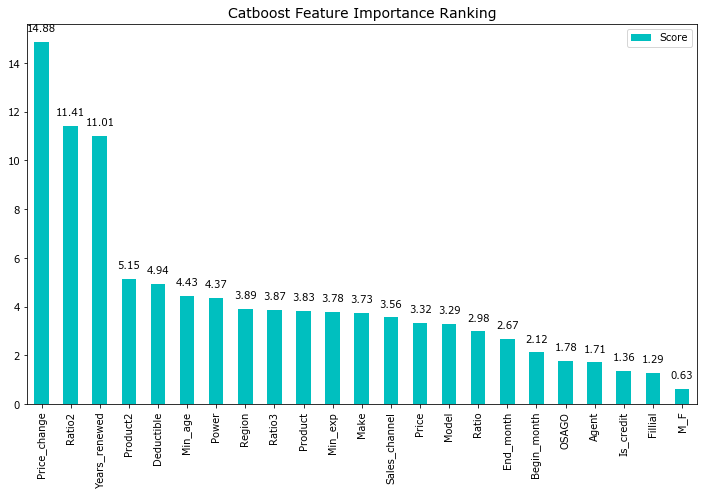

In [19]:
plt.rcParams['figure.figsize'] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize=14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [20]:
cv_params = model.get_params()

X = pd.concat([X_train_catboost, X_test_catboost], axis=0)
y = pd.concat([y_train_catboost, y_test_catboost], axis=0)

cv_data = cv(
    Pool(X, y, cat_features=cat_features_idx),  
    cv_params,
    nfold = 5,
    plot=True
)

Change of simpleCtr will not affect combinations ctrs.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [21]:
print("Наилучшее значение AUC перекрестной проверки: {:.2f}±{:.2f} на шаге {}".format(
    np.max(cv_data['test-AUC-mean']),
    cv_data['test-AUC-std'][cv_data['test-AUC-mean'].idxmax()],
    cv_data['test-AUC-mean'].idxmax())
)

Наилучшее значение AUC перекрестной проверки: 0.74±0.00 на шаге 1198
